In [1]:
import networkx as nx
import random
import numpy as np
import pandas as pd
from network_build import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
driver = pd.read_csv("..//..//..//Database//NYC_trip//driver_260.csv", index_col=0)
order = pd.read_csv("..//..//..//Database//NYC_trip//order_clean_260.csv", index_col=0)
area = np.load("..//..//..//Database//NYC_area//NY_area.npy")

In [3]:
order["call_time"] = pd.to_datetime(order["call_time"])
order["end_time"] = pd.to_datetime(order["end_time"])
start_time = pd.to_datetime("2022-06-01 06:00:00 AM")
end_time = pd.to_datetime("2022-06-01 06:30:00 AM")
order_pick = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]
order_pick = order_pick[["sid", "call_time", "eid", "end_time"]]
order_pick = order_pick.values
driver["time"] = pd.date_range(start=start_time, end=start_time, periods=len(driver))
driver.columns = ["id", "time"]
driver_pick = driver.values

In [4]:
# Only consider order nodes
interval = 60
df_list = []
time_list = ['6-7am', '7-8am', '8-9am', '9-10am', '6-10am']

# create hourly network
for i in range(4):
    start_time = pd.to_datetime("2022-06-01 06:00:00 AM") + pd.Timedelta(minutes=i*interval)
    end_time = pd.to_datetime("2022-06-01 06:00:00 AM") + pd.Timedelta(minutes=(i+1)*interval)
    order_pick = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]
    order_pick = order_pick[["sid", "call_time", "eid", "end_time"]]
    order_pick = order_pick.values
    

    net = ConstructNetwork(order_pick, driver_pick, area, void = 10)
    G_order = net.build_network(network_type="order")
    net.saveNetwork(G_order, "..//..//..//Database//network//order_%s.gpickle"%time_list[i])
    df = net.network_metrics(G_order)
    df["time"] = time_list[i]
    df_list.append(df)

# create 4-hour network
start_time = pd.to_datetime("2022-06-01 06:00:00 AM") 
end_time = pd.to_datetime("2022-06-01 10:00:00 AM")
order_pick = order[(order["call_time"] > start_time) & (order["call_time"] <= end_time)]
order_pick = order_pick[["sid", "call_time", "eid", "end_time"]]
order_pick = order_pick.values

net = ConstructNetwork(order_pick, driver_pick, area, void = 10)
G_order = net.build_network(network_type="order")
net.saveNetwork(G_order, "..//..//..//Database//network//order_%s.gpickle"%time_list[-1])
df_4h = net.network_metrics(G_order)
df_4h["time"] = time_list[-1]
df_list.append(df_4h)

In [5]:
df_all = pd.concat(df_list, axis=0)
df_all.to_csv("..//..//..//Database//network//network_metrics.csv")

In [8]:
df_all = pd.read_csv("..//..//..//Database//network//network_metrics.csv", index_col=0)

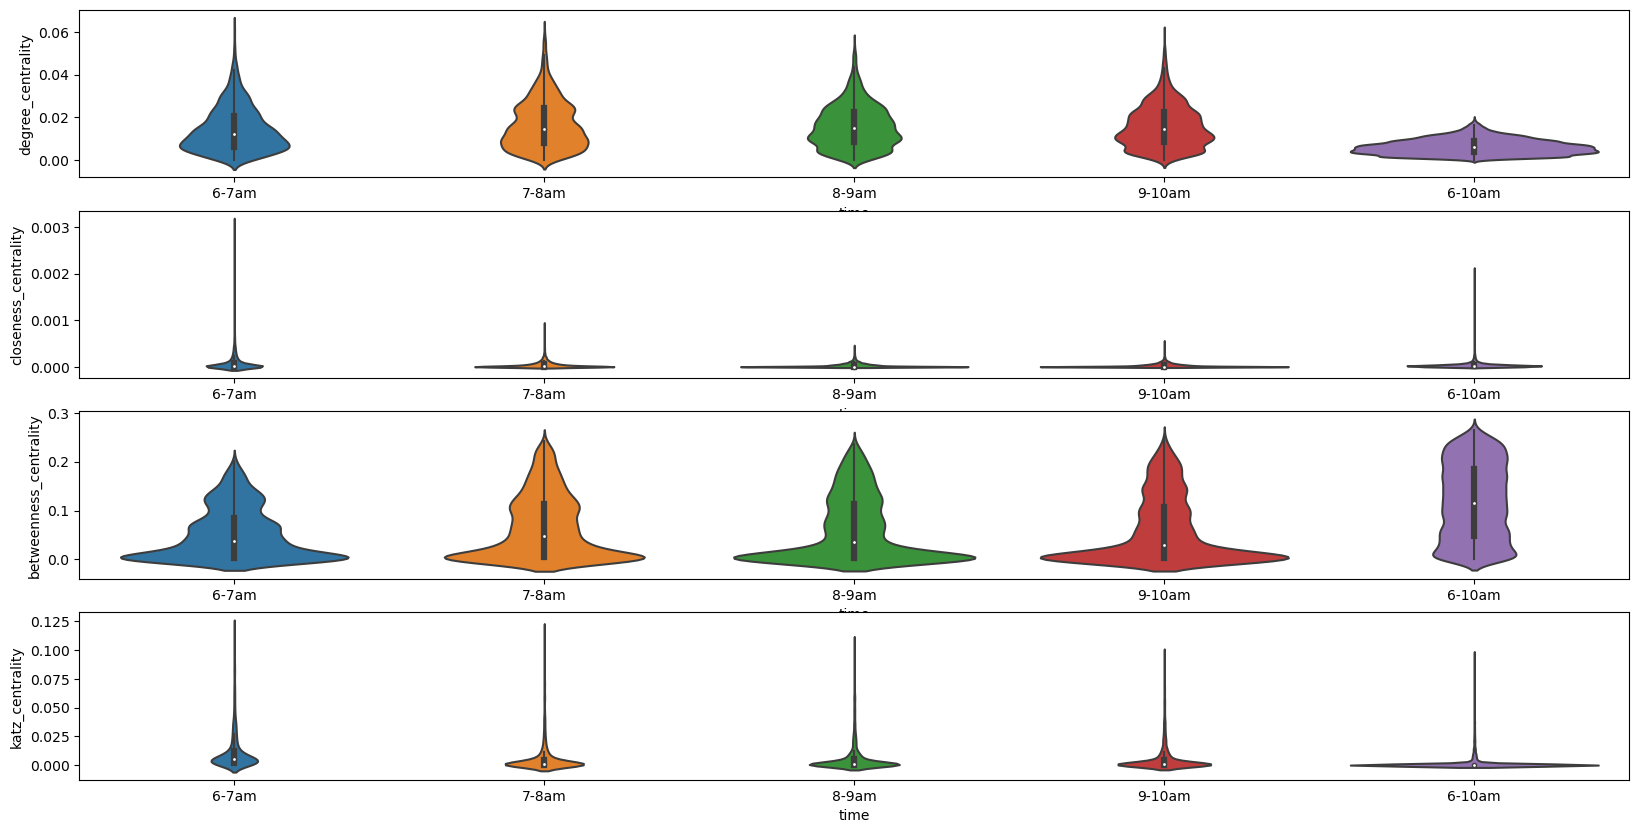

In [12]:
figure, axes = plt.subplots(4, 1, figsize=(20, 10))
axes = axes.flatten()
sns.violinplot(x="time", y="degree_centrality", data=df_all, ax=axes[0], fill=False)
sns.violinplot(x="time", y="closeness_centrality", data=df_all, ax=axes[1])
sns.violinplot(x="time", y="betweenness_centrality", data=df_all, ax=axes[2])
sns.violinplot(x="time", y="katz_centrality", data=df_all, ax=axes[3])
plt.show()

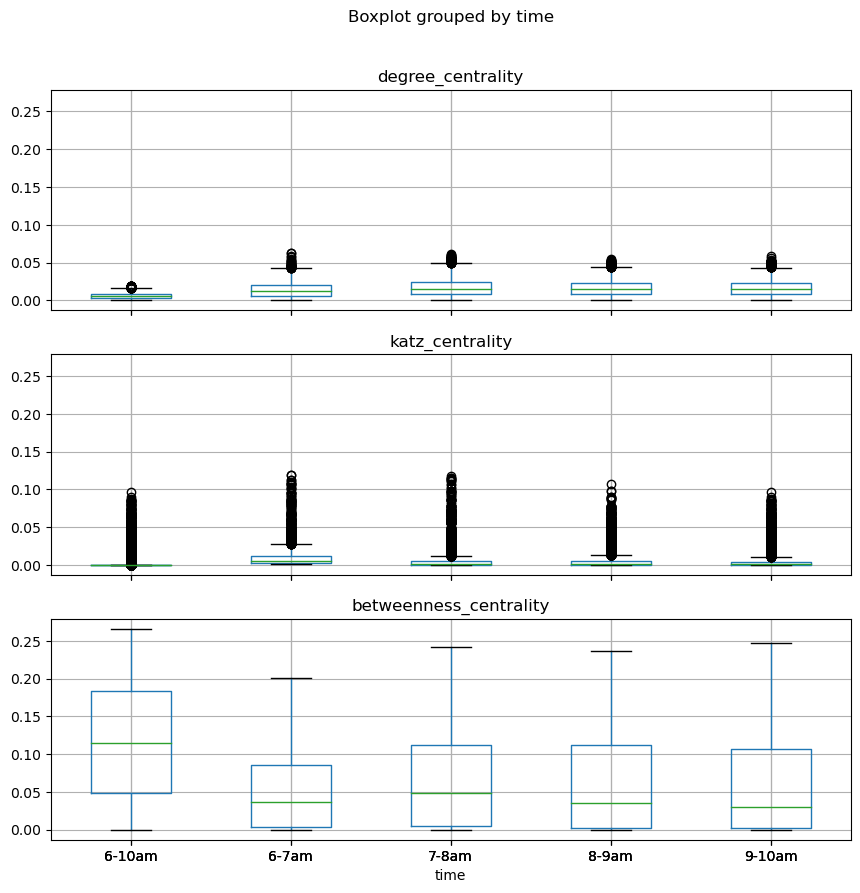

In [11]:
df_all.boxplot(column=["degree_centrality", "katz_centrality", "betweenness_centrality"], by="time", figsize=(10, 10), layout=(3, 1))
plt.show()